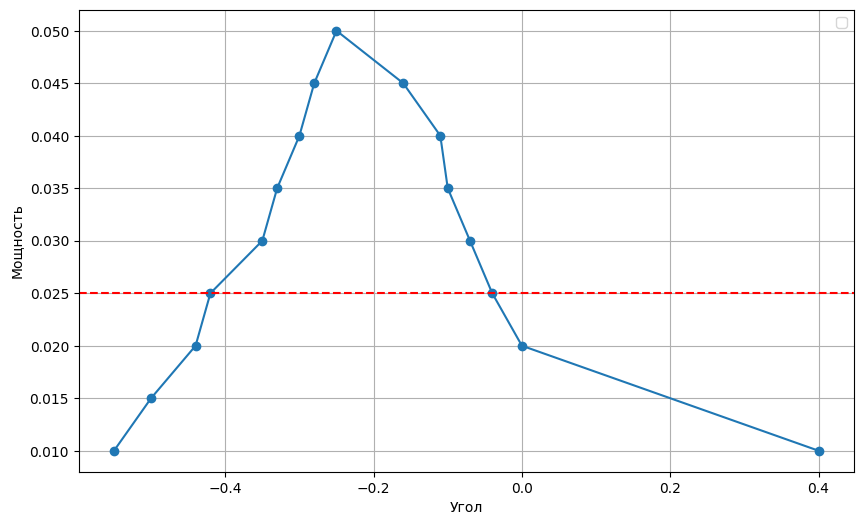

Width of Synchronization Angle: 0.38


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {    "angle": [0.4, 0, -0.04, -0.07, -0.1, -0.11, -0.16, -0.25, -0.28, -0.3, -0.33, -0.35, -0.42, -0.44, -0.5, -0.55],
    "power": [0.01, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['angle'], df['power'], marker='o', linestyle='-')
plt.xlabel('Угол')
plt.ylabel('Мощность')
plt.grid(True)

# линия для половины максимума
half_max = max(df['power']) / 2
plt.axhline(y=half_max, color='r', linestyle='--')

plt.legend()

plt.show()

half_max_angles = df[df['power'] >= half_max]['angle'].tolist()
width_of_sync_angle = max(half_max_angles) - min(half_max_angles)
print("Width of Synchronization Angle:", width_of_sync_angle)


Полуширина на полувысоте (HWHM): 0.20119828768126247


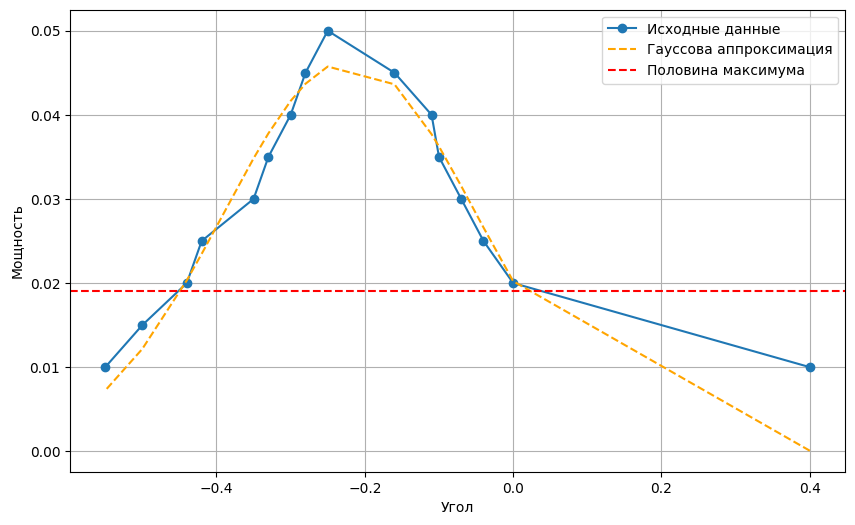

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Данные
data = {
    "angle": [0.4, 0, -0.04, -0.07, -0.1, -0.11, -0.16, -0.25, -0.28, -0.3, -0.33, -0.35, -0.42, -0.44, -0.5, -0.55],
    "power": [0.01, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01]
}
df = pd.DataFrame(data)

# Гауссова функция
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Начальные приближения для параметров гауссовой функции
initial_guess = [max(df['power']), 0, 0.1]  # амплитуда, центр, ширина

# Подгонка
popt, _ = curve_fit(gaussian, df['angle'], df['power'], p0=initial_guess)
a, x0, sigma = popt

# График
plt.figure(figsize=(10, 6))
plt.plot(df['angle'], df['power'], marker='o', linestyle='-', label='Исходные данные')
plt.plot(df['angle'], gaussian(df['angle'], *popt), color='orange', linestyle='--', label='Гауссова аппроксимация')

# Линия для половины максимума
half_max = max(df['power']) / 2
plt.axhline(y=0.019, color='r', linestyle='--', label='Половина максимума')

plt.xlabel('Угол')
plt.ylabel('Мощность')
plt.grid(True)
plt.legend()

# Полуширина на полувысоте (HWHM)
HWHM = np.sqrt(2 * np.log(2)) * sigma
print("Полуширина на полувысоте (HWHM):", HWHM)

plt.show()

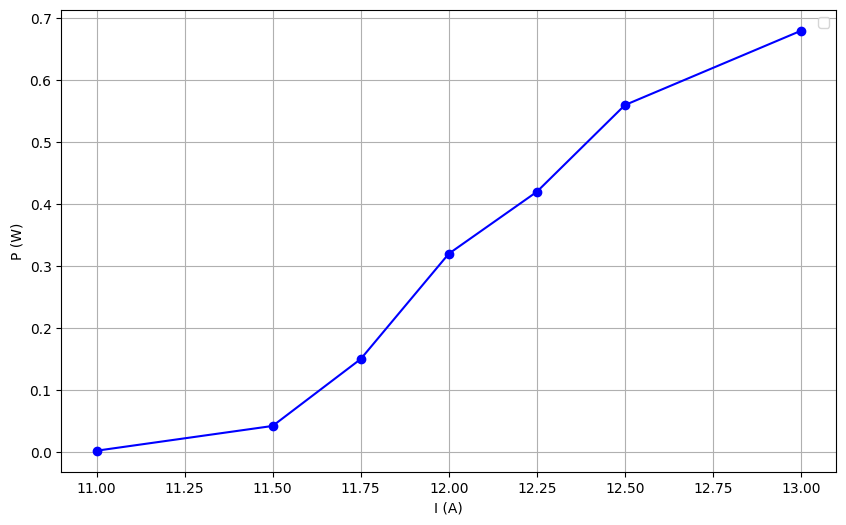

Пиковая мощность: 0.68 Вт
КПД лазера: 0.07692307692307693 %


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {    "I": [13, 12.5,12.25, 12, 11.75, 11.5, 11],
    "P": [0.68, 0.56,0.42, 0.32, 0.15, 0.042, 0.002]}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df['I'], df['P'], marker='o', linestyle='-', color='blue')
plt.xlabel('I (A)')
plt.ylabel('P (W)')
plt.grid(True)
plt.legend()
plt.show()

# пиковая мощность
pulse_duration = 20e-9
E_output = max(df['P']) * pulse_duration
P_peak = E_output / pulse_duration

# КПД
max_output_power = max(df['P'])
max_input_power = max(df['I']) * 0.68
efficiency = (max_output_power / max_input_power)

print("Пиковая мощность:", P_peak, "Вт")
print("КПД лазера:", efficiency, "%")


[0.09410236 0.0165315  0.00342606]
0.028162320173421792


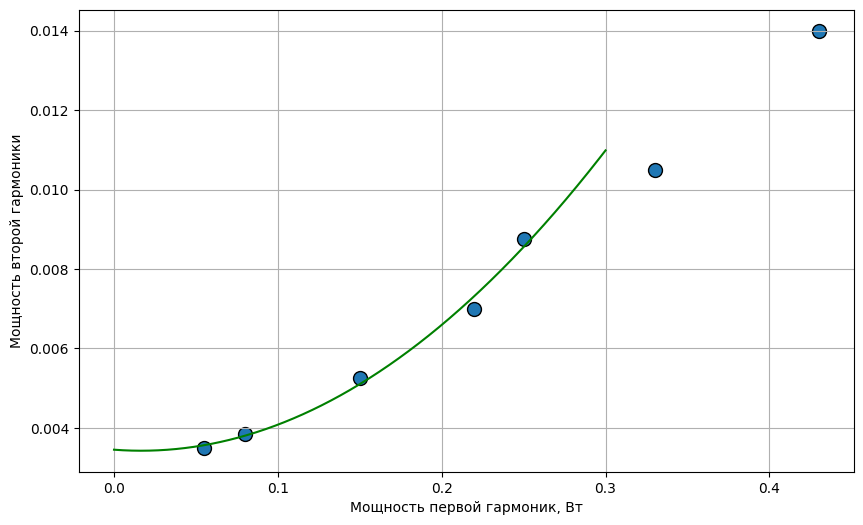

In [26]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import numpy as np

quadratic = lambda x, a, b, c: a * np.power(x - b, 2) + c

P = np.array([0.01, 0.02, 0.025, 0.03, 0.04, 0.015, 0.011]) * 0.35
P_photo = np.array([0.055, 0.22, 0.25, 0.33, 0.43, 0.15, 0.08]) 
MNK = stats.linregress(P_photo, P)
mask = P_photo < 0.3

param, _ = optimize.curve_fit(quadratic,P_photo[mask], P[mask], p0 = [1, 0.05, 0.001])
print(param)
print(MNK.slope)
x_line = np.linspace(0, 0.3, 1000)
y_line = MNK.slope * x_line + MNK.intercept
y_q = quadratic(x_line, *param)
plt.figure(figsize=(10, 6))
plt.scatter(P_photo, P, edgecolor = 'black', s = 100)

plt.plot(x_line, y_q, color = 'green')
plt.ylabel('Мощность второй гармоники')
plt.xlabel('Мощность первой гармоник, Вт')

plt.grid(True)
plt.show()

*Почему КПД маленький?*

Потому что светим лампой с широким спектром, а у неодима узкий спектр поглощения

\\

*Привести параметры, которые влияют на эффективность генерации второй гармоники*

Угол, длина кристалла, нелинейная восприимчивость кристалла, интенсивность накачки, температура(?)